In [15]:
import sys
import scipy
import numpy             as     np
import pylab             as     pl
import matplotlib.pyplot as     plt

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [23]:
from   distances import comoving_distance, dist_mod
from   ajs_kcorr import ajs_kcorr
from   params    import params
from   tmr_kcorr import tmr_kcorr
from   ref_gmr   import one_reference_gmr
from   abs_mag   import abs_mag, app_mag
from   tmr_ecorr import tmr_ecorr

Text(0.5, 0.98, '$r=19.0$ with $(g-r)=1.0$')

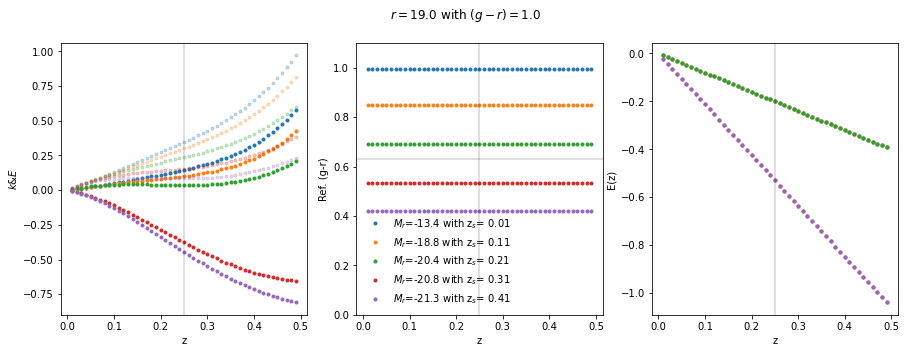

In [39]:
x           = ajs_kcorr()  # [ajs_kcorr, tmr_kcorr]                                                                                                                                                                                          

rp          =  19.0
band        =    'r'
obs_gmr     =   1.0

fig, axes   = plt.subplots(1, 3, figsize=(15, 5))

prop_cycle  = plt.rcParams['axes.prop_cycle']
colors      = prop_cycle.by_key()['color']

for i, zs in enumerate(np.arange(0.01, 0.5, 0.1)):
    chi     = comoving_distance(zs)
    mu      = dist_mod(chi)

    MM      = abs_mag(x, rp, obs_gmr, zs,  band='r').item()
    ref_gmr = one_reference_gmr(x, obs_gmr, zs, zref=params['ref_z'])

    for j, zz in enumerate(np.arange(0.01, 0.5, 0.01)):
        if j == 0:
            label = r'$M_r$' + '={:.1f}'.format(MM) + ' with z$_s$' + '= {:.2f}'.format(zs)
        else:
            label = ''
            
        kk      = x.eval(ref_gmr, zz, band=band, ref_z=params['ref_z'], ecorr=False)
        kkE     = x.eval(ref_gmr, zz, band=band, ref_z=params['ref_z'], ecorr=True)

        mm      = app_mag(x, MM, obs_gmr, zz, band='r', ref_gmr=ref_gmr).item()

        axes[0].plot(zz, kk,  marker='.', lw=0.0, c=colors[i], alpha=0.25)
        axes[0].plot(zz, kkE, marker='.', lw=0.0, c=colors[i])                                                                                                                                                                                              
        
        axes[1].plot(zz, ref_gmr,  marker='.', lw=0.0, c=colors[i], label=label)
    
        tt      = 'blue' if (ref_gmr <= params['rf_gmr_redblue']) else 'red'
        E       = tmr_ecorr(zz, tt=tt, zref=params['ref_z'], band='r')
    
        axes[2].plot(zz, E, marker='.', lw=0.0, c=colors[i])
    
axes[0].axvline(0.25, lw=0.25, c='k')
axes[0].set_xlabel('z')
axes[0].set_ylabel('$k&E$')

axes[1].axhline(params['rf_gmr_redblue'], lw=0.25, c='k')
axes[1].axvline(0.25, lw=0.25, c='k')
axes[1].set_ylim(0.0, 1.1)
axes[1].set_xlabel('z')
axes[1].set_ylabel('Ref. (g-r)')
axes[1].legend(frameon=False, loc=3)

axes[2].axvline(0.25, lw=0.25, c='k')
axes[2].set_xlabel('z')
axes[2].set_ylabel('E(z)')

fig.suptitle('$r=19.0$ with $(g-r)=1.0$')

# Done.